# EDA & Baselines
Use this notebook to explore OHLCV data quality, visualize feature distributions, and sanity‑check labels.

In [1]:
!pip install -q yfinance


In [2]:
import sys
# install project deps + Yahoo Finance into THIS kernel
!{sys.executable} -m pip install -q -r ../requirements.txt yfinance


In [3]:
import os
os.chdir("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
print("CWD:", os.getcwd())



CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [4]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
print("PYTHONPATH:", os.environ["PYTHONPATH"])


PYTHONPATH: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [5]:
import sys
!{sys.executable} -m pip install -q -r requirements.txt yfinance

!PYTHONPATH=. python scripts/fetch_ohlcv.py --config configs/default.yaml
!PYTHONPATH=. python scripts/build_technical_features.py --config configs/default.yaml


Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv


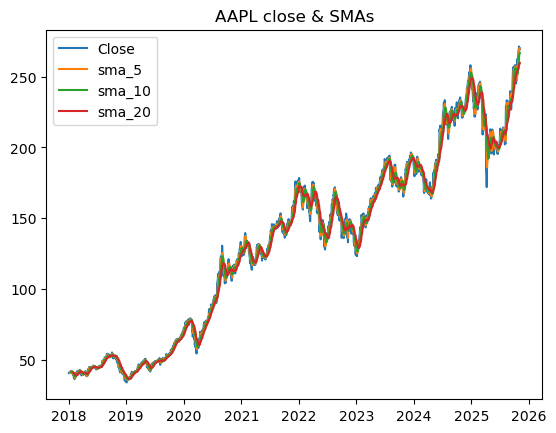

In [6]:
import pandas as pd, matplotlib.pyplot as plt
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values("date")
t = "AAPL"; d = df[df["ticker"]==t]
plt.plot(d["date"], d["close"], label="Close")
for col in ["sma_5","sma_10","sma_20"]:
    if col in d: plt.plot(d["date"], d[col], label=col)
plt.legend(); plt.title(f"{t} close & SMAs"); plt.show()


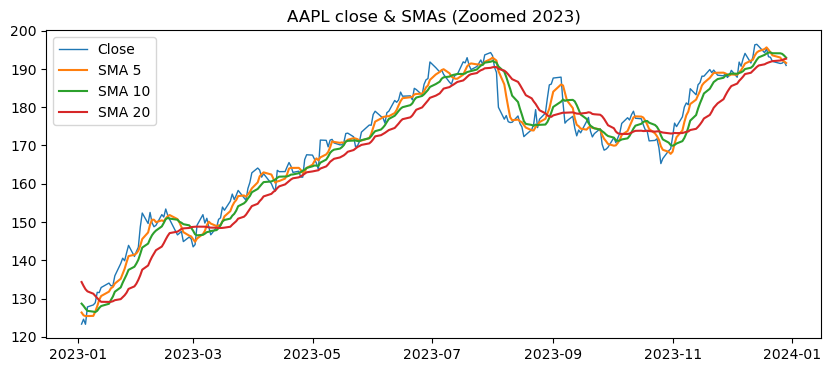

In [7]:
plt.figure(figsize=(10,4))
subset = d[d["date"].between("2023-01-01", "2024-01-01")]
plt.plot(subset["date"], subset["close"], label="Close", linewidth=1)
plt.plot(subset["date"], subset["sma_5"], label="SMA 5")
plt.plot(subset["date"], subset["sma_10"], label="SMA 10")
plt.plot(subset["date"], subset["sma_20"], label="SMA 20")
plt.title("AAPL close & SMAs (Zoomed 2023)")
plt.legend(); plt.show()


In [8]:
import sys
!{sys.executable} -m pip install -q yfinance


In [9]:
import shutil, os
for p in ["data/raw", "data/processed"]:
    if os.path.isdir(p):
        shutil.rmtree(p)
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)


In [10]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
!python scripts/fetch_ohlcv.py --config configs/default.yaml
!python scripts/build_technical_features.py --config configs/default.yaml


Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv


In [11]:
import pandas as pd, glob
paths = glob.glob("data/raw/ohlcv_*.csv")
for p in paths:
    df = pd.read_csv(p, nrows=3)  # small sniff
    print(p, "dtypes:", dict(df.dtypes))


data/raw/ohlcv_MSFT.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_NVDA.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AMZN.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_SPY.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AAPL.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AMD.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'l

In [12]:
!python scripts/fetch_ohlcv.py --config configs/default.yaml
!python scripts/build_technical_features.py --config configs/default.yaml


Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv


In [13]:
import pandas as pd
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values("date")
df.dtypes  # confirm numeric types
df.head()


,date,ticker,open,high,low,close,volume,ret_1d,sma_5,mom_5,sma_10,mom_10,sma_20,mom_20,vol_20,rsi,y
0,2018-01-02,MSFT,86.129997,86.309998,85.500000,79.198326,22483800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
15784,2018-01-02,META,177.679993,181.580002,177.550003,180.308456,18151900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13811,2018-01-02,TSLA,20.799999,21.474001,20.733334,21.368668,65283000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1973,2018-01-02,NVDA,4.894500,4.987500,4.862500,4.928805,355616000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5919,2018-01-02,SPY,267.839996,268.809998,267.399994,237.909149,86655700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
import pandas as pd

df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values(["ticker","date"])

# last 5 rows for each ticker
tail_per_ticker = (df.groupby("ticker", group_keys=True)
                     .apply(lambda g: g.tail(5))
                     .reset_index(drop=True))
tail_per_ticker


/var/folders/b_/mlsl2ls12tv6tnhpgltb9vnc0000gn/T/ipykernel_17363/354160735.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tail_per_ticker = (df.groupby("ticker", group_keys=True)


,date,ticker,open,high,low,close,volume,ret_1d,sma_5,mom_5,sma_10,mom_10,sma_20,mom_20,vol_20,rsi,y
0,2025-10-29,AAPL,269.279999,271.410004,267.109985,269.700012,51086700.0,0.002602,265.982001,0.043529,261.310999,0.081656,257.178500,0.055784,0.244341,67.163565,1
1,2025-10-30,AAPL,271.989990,274.140015,268.480011,271.399994,69886500.0,0.006303,268.346002,0.045535,263.705998,0.096787,257.891999,0.055497,0.244288,83.891088,0
2,2025-10-31,AAPL,276.989990,277.320007,269.160004,270.369995,86167100.0,-0.003795,269.856000,0.028727,265.513998,0.071664,258.509499,0.047865,0.245389,80.532438,0
3,2025-11-03,AAPL,270.420013,270.850006,266.250000,269.049988,50194600.0,-0.004882,269.903998,0.000893,266.194998,0.025969,259.127499,0.048151,0.245279,77.708349,1
4,2025-11-04,AAPL,268.329987,271.489990,267.619995,270.040009,49274800.0,0.003680,270.112000,0.003866,266.922000,0.027667,259.805499,0.052870,0.244999,77.366506,0
5,2025-10-29,AMD,264.190002,267.079987,257.399994,264.329987,49335600.0,0.024495,253.984003,0.148113,244.638000,0.107837,227.623000,0.611670,1.057334,65.345559,0
6,2025-10-30,AMD,259.920013,263.880005,252.309998,254.839996,45162500.0,-0.035902,257.954001,0.084472,246.666000,0.086460,231.878500,0.501443,1.079153,71.258251,1
7,2025-10-31,AMD,259.600006,262.130005,253.410004,256.119995,34449200.0,0.005023,258.594000,0.012652,248.970000,0.098850,236.450999,0.555353,1.063710,71.184631,1
8,2025-11-03,AMD,259.329987,260.910004,253.889999,259.649994,36351400.0,0.013783,258.589996,-0.000077,250.878999,0.079356,239.247999,0.274606,0.706626,71.745499,0
9,2025-11-04,AMD,250.350006,257.380005,247.389999,250.050003,56491800.0,-0.036973,256.997995,-0.030852,252.081000,0.050498,241.174999,0.182214,0.721423,56.763142,0


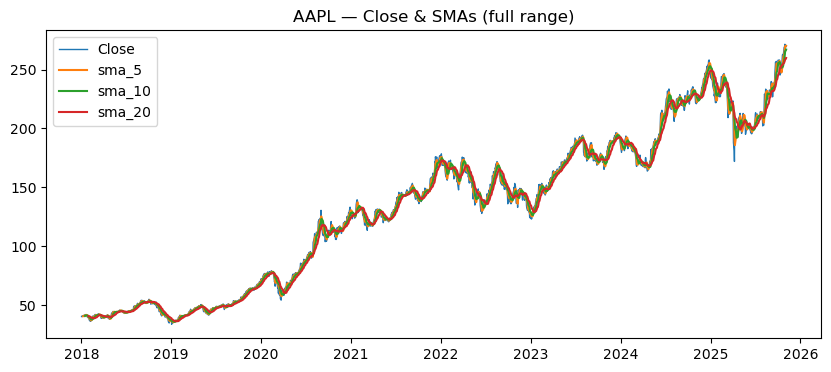

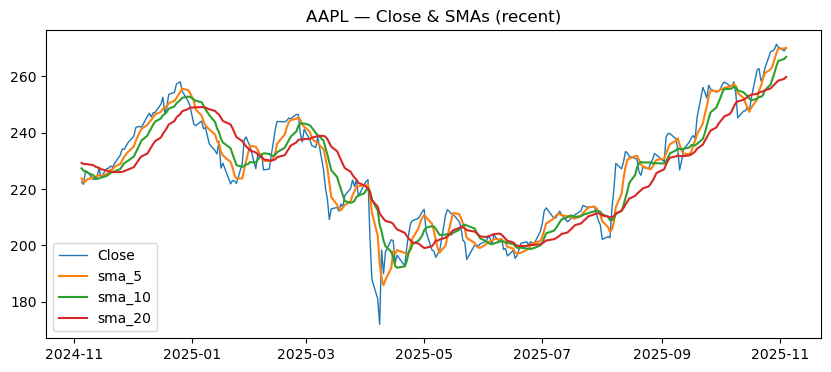

In [15]:
import matplotlib.pyplot as plt

aapl = df[df["ticker"]=="AAPL"].sort_values("date")

# full range
plt.figure(figsize=(10,4))
plt.plot(aapl["date"], aapl["close"], label="Close", linewidth=1)
for col in ["sma_5","sma_10","sma_20"]:
    if col in aapl: plt.plot(aapl["date"], aapl[col], label=col)
plt.title("AAPL — Close & SMAs (full range)")
plt.legend(); plt.show()

# zoom into the most recent ~250 trading days (~1 year)
recent = aapl.tail(250)
plt.figure(figsize=(10,4))
plt.plot(recent["date"], recent["close"], label="Close", linewidth=1)
for col in ["sma_5","sma_10","sma_20"]:
    if col in recent: plt.plot(recent["date"], recent[col], label=col)
plt.title("AAPL — Close & SMAs (recent)")
plt.legend(); plt.show()


In [16]:
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
df = df.sort_values(["ticker", "date"])

train_df = df[df["date"] < "2024-01-01"]
test_df  = df[df["date"] >= "2024-01-01"]

X_train, y_train = train_df.drop(columns=["y"]), train_df["y"]
X_test,  y_test  = test_df.drop(columns=["y"]),  test_df["y"]


In [17]:
import os, numpy as np, pandas as pd
os.environ["PYTHONPATH"] = os.getcwd()

from scripts.LogisticRegression import LogisticRegression, add_intercept

# Load and prepare data
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values(["ticker","date"])

feat_cols = [c for c in df.columns if c.startswith(("sma_","mom_","vol_","rsi"))] + ["ret_1d"]

# Drop warm-up NaNs per ticker
def drop_warmup(g):
    return g.dropna(subset=feat_cols + ["y"])
clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)

# Chronological split
train = clean[clean["date"] < "2024-01-01"]
test  = clean[clean["date"] >= "2024-01-01"]

Xtr = train[feat_cols].to_numpy(float)
Xte = test [feat_cols].to_numpy(float)
ytr = train["y"].to_numpy(int)
yte = test ["y"].to_numpy(int)

# Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

# Train (set verbose=False if you want a quiet run; l2>0 for regularization)
clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=True, l2=0.0)
clf.fit(Xtr, ytr)

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

p = clf.predict_proba(Xte)
yhat = (p >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(yte, yhat))
print("Test ROC AUC :", roc_auc_score(yte, p))
print(classification_report(yte, yhat, digits=3))

# Save model (optional)
# clf.save("models/logreg_baseline.npz", feature_names=["(intercept)"] + feat_cols)


/var/folders/b_/mlsl2ls12tv6tnhpgltb9vnc0000gn/T/ipykernel_17363/1321098960.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)


iter   0 | step_L1 4.105e+00 | avg_loglik -0.693147
iter   3 | step_L1 1.353e-13 | avg_loglik -0.690309
Test Accuracy: 0.532829373650108
Test ROC AUC : 0.517975913728529
              precision    recall  f1-score   support

           0      0.490     0.301     0.373      2136
           1      0.550     0.731     0.628      2494

    accuracy                          0.533      4630
   macro avg      0.520     0.516     0.500      4630
weighted avg      0.522     0.533     0.510      4630



In [18]:
from scripts.LogisticRegression import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd, numpy as np

lambdas = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
results = []

for lam in lambdas:
    clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=False, l2=lam)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)
    auc = roc_auc_score(yte, p)
    acc = accuracy_score(yte, (p >= 0.5).astype(int))
    results.append({"lambda": lam, "AUC": auc, "Acc": acc})

res = pd.DataFrame(results)
print(res.sort_values("AUC", ascending=False))


     lambda       AUC       Acc
3  0.000100  0.519061  0.531749
2  0.000010  0.518271  0.531317
1  0.000001  0.518016  0.533045
0  0.000000  0.517976  0.532829
4  0.001000  0.516938  0.532829
5  0.010000  0.514032  0.526566


In [19]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
!python scripts/make_labels.py --input data/processed/technical_only.csv --horizon_days 5 --threshold 0.0 --out data/processed/technical_only_h5.csv


Saved data/processed/technical_only_h5.csv with label column 'y_h5'


In [20]:
import os, numpy as np, pandas as pd
os.environ["PYTHONPATH"] = os.getcwd()

from scripts.LogisticRegression import LogisticRegression, add_intercept

# 1) Load the H=5 dataset
df = pd.read_csv("data/processed/technical_only_h5.csv", parse_dates=["date"])\
       .sort_values(["ticker","date"])

# 2) Features: same technical indicators as before (do NOT include any forward-return columns)
feat_cols = [c for c in df.columns if c.startswith(("sma_","mom_","vol_","rsi"))] + ["ret_1d"]

# 3) Drop warm-up NaNs per ticker (now using the y_h5 label)
def drop_warmup(g):
    return g.dropna(subset=feat_cols + ["y_h5"])

clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)

# 4) Chronological split (same date cut as before)
train = clean[clean["date"] < "2024-01-01"]
test  = clean[clean["date"] >= "2024-01-01"]

Xtr = train[feat_cols].to_numpy(float)
Xte = test [feat_cols].to_numpy(float)
ytr = train["y_h5"].to_numpy(int)
yte = test ["y_h5"].to_numpy(int)

# 5) Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

# 6) Train (you can set l2=1e-3 for mild regularization; here 0.0 to match your earlier run)
clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=True, l2=0.0)
clf.fit(Xtr, ytr)

# 7) Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

p = clf.predict_proba(Xte)
yhat = (p >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(yte, yhat))
print("Test ROC AUC :", roc_auc_score(yte, p))
print(classification_report(yte, yhat, digits=3))

#8) (Optional) Save model
from pathlib import Path
Path("models").mkdir(exist_ok=True)
clf.save("models/logreg_baseline_h5.npz", feature_names=["(intercept)"] + feat_cols)


iter   0 | step_L1 3.642e+00 | avg_loglik -0.693147
iter   3 | step_L1 5.654e-12 | avg_loglik -0.681898
Test Accuracy: 0.551528384279476
Test ROC AUC : 0.5071711922067814
              precision    recall  f1-score   support

           0      0.424     0.213     0.284      1908
           1      0.585     0.793     0.674      2672

    accuracy                          0.552      4580
   macro avg      0.505     0.503     0.479      4580
weighted avg      0.518     0.552     0.511      4580



/var/folders/b_/mlsl2ls12tv6tnhpgltb9vnc0000gn/T/ipykernel_17363/1986447659.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)


In [21]:
print("Train y_h5 mean (fraction of 1s):", ytr.mean().round(3))
print("Test  y_h5 mean (fraction of 1s):", yte.mean().round(3))


Train y_h5 mean (fraction of 1s): 0.567
Test  y_h5 mean (fraction of 1s): 0.583


In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from scripts.LogisticRegression import LogisticRegression, add_intercept

# Rebuild design matrices from your existing train/test DataFrames
Xtr_raw = train[feat_cols].to_numpy(float)
Xte_raw = test [feat_cols].to_numpy(float)
ytr = train["y_h5"].to_numpy(int)
yte = test ["y_h5"].to_numpy(int)

# Standardize (fit on train, apply to test)
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr_raw)
Xte = scaler.transform(Xte_raw)

# Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

lambdas = [0.0, 1e-3, 1e-2]  # tiny sweep
for lam in lambdas:
    clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=False, l2=lam)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)
    yhat = (p >= 0.5).astype(int)
    print(f"\nL2={lam:g}")
    print("  Test AUC :", roc_auc_score(yte, p))
    print("  Accuracy :", accuracy_score(yte, yhat))
    print(classification_report(yte, yhat, digits=3))



L2=0
  Test AUC : 0.5071711922067814
  Accuracy : 0.551528384279476
              precision    recall  f1-score   support

           0      0.424     0.213     0.284      1908
           1      0.585     0.793     0.674      2672

    accuracy                          0.552      4580
   macro avg      0.505     0.503     0.479      4580
weighted avg      0.518     0.552     0.511      4580


L2=0.001
  Test AUC : 0.5082237255049649
  Accuracy : 0.5491266375545851
              precision    recall  f1-score   support

           0      0.417     0.208     0.278      1908
           1      0.584     0.793     0.672      2672

    accuracy                          0.549      4580
   macro avg      0.501     0.500     0.475      4580
weighted avg      0.514     0.549     0.508      4580


L2=0.01
  Test AUC : 0.5081886149085476
  Accuracy : 0.5478165938864629
              precision    recall  f1-score   support

           0      0.416     0.210     0.279      1908
           1      0.5

In [23]:
coef_df = pd.DataFrame({
    "feature": ["(intercept)"] + feat_cols,
    "theta": clf.theta
}).sort_values("theta", ascending=False)
print(coef_df.head(10))
print(coef_df.tail(10))


       feature     theta
0  (intercept)  0.259011
4       mom_10  0.034219
8          rsi  0.006801
6       mom_20 -0.003858
5       sma_20 -0.028165
9       ret_1d -0.030124
3       sma_10 -0.032071
2        mom_5 -0.037238
1        sma_5 -0.044124
7       vol_20 -0.092523
       feature     theta
0  (intercept)  0.259011
4       mom_10  0.034219
8          rsi  0.006801
6       mom_20 -0.003858
5       sma_20 -0.028165
9       ret_1d -0.030124
3       sma_10 -0.032071
2        mom_5 -0.037238
1        sma_5 -0.044124
7       vol_20 -0.092523


# Sentiments

In [24]:
import os
os.chdir("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
print("CWD:", os.getcwd())


CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [25]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
print("PYTHONPATH:", os.environ["PYTHONPATH"])

PYTHONPATH: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [26]:
!pip install -q yfinance --upgrade


In [27]:
%cd "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
%env PYTHONPATH=.



/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
env: PYTHONPATH=.


In [28]:
import json, textwrap, yfinance as yf

raw = yf.Ticker("AAPL").news or []
print("items =", len(raw))
if raw:
    print("type(content) =", type(raw[0].get("content")))
    print(textwrap.shorten(str(raw[0].get("content")), width=300, placeholder="..."))


items = 10
type(content) = <class 'dict'>
{'id': 'b1bd5b6f-ad12-430b-b6ed-2670d6e4a5d0', 'contentType': 'STORY', 'title': 'Apple could make $133 billion a year on humanoid robots by 2040: Morgan Stanley', 'description': '', 'summary': 'Morgan Stanley predicts Apple could generated $133 billion a year from humanoid robots by the year...


In [29]:
# Writes scripts/merge_features.py
from pathlib import Path
code = r"""#!/usr/bin/env python
import argparse, os
import pandas as pd

def main(tech_path, out_path, sent_path=None, label_col="y_h5"):
    # Load technical features (+ labels)
    tech = pd.read_csv(tech_path, parse_dates=["date"]).sort_values(["ticker","date"])

    # Basic sanity
    if "ticker" not in tech.columns or "date" not in tech.columns:
        raise ValueError(f"{tech_path} must contain 'date' and 'ticker' columns")
    if label_col not in tech.columns:
        raise ValueError(f"Label column '{label_col}' not found in {tech_path}")

    merged = tech.copy()

    # Optionally bring in sentiment features
    if sent_path:
        sent = pd.read_csv(sent_path, parse_dates=["date"]).sort_values(["ticker","date"])
        if "ticker" not in sent.columns or "date" not in sent.columns:
            raise ValueError(f"{sent_path} must contain 'date' and 'ticker' columns")
        # Determine sentiment feature columns (everything except keys)
        sent_feat_cols = [c for c in sent.columns if c not in ("date","ticker")]
        if len(sent_feat_cols) == 0:
            print(f"[warn] No sentiment columns found in {sent_path}; performing a no-op merge.")
        merged = pd.merge(
            merged,
            sent[["date","ticker"] + sent_feat_cols],
            on=["date","ticker"],
            how="left",
            validate="m:1"
        )

    # Write
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    merged.to_csv(out_path, index=False)
    print(f"[ok] wrote {out_path} | rows={len(merged)} | cols={len(merged.columns)}")

if __name__ == "__main__":
    ap = argparse.ArgumentParser()
    ap.add_argument("--tech", required=True, help="CSV with technical features and labels (must include date,ticker,label)")
    ap.add_argument("--sent", default=None, help="CSV with sentiment features (must include date,ticker)")
    ap.add_argument("--out", required=True, help="Output CSV")
    ap.add_argument("--label_col", default="y_h5", help="Name of label column to keep/check (default: y_h5)")
    args = ap.parse_args()
    main(args.tech, args.out, args.sent, args.label_col)
"""
Path("scripts").mkdir(parents=True, exist_ok=True)
Path("scripts/merge_features.py").write_text(code)
print("Wrote scripts/merge_features.py")


Wrote scripts/merge_features.py


In [30]:
import sys
sys.path.insert(0, "scripts")
from LogisticRegression import LogisticRegression


In [31]:
# Rebuild OHLCV up to today, then re-compute technical features + H=5 labels
%cd "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
%env PYTHONPATH=.
!python scripts/fetch_ohlcv.py --config configs/default.yaml
!python scripts/build_technical_features.py --config configs/default.yaml

# (Re)make labels at H=5 (if not already done)
!python scripts/make_labels.py \
  --input data/processed/technical_only.csv \
  --horizon_days 5 --threshold 0.0 \
  --out data/processed/technical_only_h5.csv

# Compute LAST_DATE = min(latest date across tickers in technical_only.csv, today)
import pandas as pd
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
LAST_DATE = pd.to_datetime(df["date"].max()).date()
print("LAST_DATE (features available through):", LAST_DATE)


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
env: PYTHONPATH=.
Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv
Saved data/processed/technical_only_h5.csv with label column 'y_h5'
LAST_DATE (features available through): 2025-11-04


In [32]:
# === Fix import path + Step 1 (fetch OHLCV) ===
import os, sys, pathlib, subprocess, shlex

PROJECT = "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
os.chdir(PROJECT)
print("CWD:", os.getcwd())

# 1) S'assurer que le projet et src/ sont dans sys.path
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
for p in [root, src]:
    if p not in sys.path:
        sys.path.insert(0, p)
print("OK sys.path patched")

# 2) (Option A) Appeler la fonction main() du script directement
try:
    from scripts.fetch_ohlcv import main as fetch_main
    print("Import OK -> scripts.fetch_ohlcv")
    fetch_main("configs/default.yaml")
except Exception as e:
    print("[warn] Option A a échoué, on tente Option B via sous-processus\n", e)

    # 3) (Option B) Lancer le script via python -m avec PYTHONPATH configuré
    env = os.environ.copy()
    # Inclure le project root ET src dans PYTHONPATH, robustement
    env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
    cmd = "python -m scripts.fetch_ohlcv --config configs/default.yaml"
    print("Running:", cmd, "\nPYTHONPATH:", env["PYTHONPATH"])
    subprocess.run(shlex.split(cmd), check=True, env=env)

# 4) Vérifier le fichier écrit
import pandas as pd
import glob
paths = sorted(glob.glob("data/raw/ohlcv_*.csv"))
print("OHLCV files found:", len(paths))
if paths:
    print(paths[:5], "...")
    df0 = pd.read_csv(paths[0])
    print("Sample file columns:", df0.columns.tolist(), "| rows:", len(df0))



CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
OK sys.path patched
Import OK -> scripts.fetch_ohlcv
Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
OHLCV files found: 10
['data/raw/ohlcv_AAPL.csv', 'data/raw/ohlcv_AMD.csv', 'data/raw/ohlcv_AMZN.csv', 'data/raw/ohlcv_GOOG.csv', 'data/raw/ohlcv_META.csv'] ...
Sample file columns: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume'] | rows: 1973


In [33]:
# Crée l’arborescence src/utils + les __init__.py si besoin
import os, textwrap, pathlib
root = pathlib.Path("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
os.chdir(root)

(os.makedirs("src/utils", exist_ok=True))
open("src/__init__.py","a").close()
open("src/utils/__init__.py","a").close()

code = textwrap.dedent("""
    import os, yaml

    def ensure_dir(path: str):
        os.makedirs(path, exist_ok=True)

    def load_config(path: str):
        with open(path, "r") as f:
            return yaml.safe_load(f)
""")
with open("src/utils/io.py","w") as f:
    f.write(code)

print("Wrote src/utils/io.py")


Wrote src/utils/io.py


In [34]:
# Assure l'import comme tout à l’heure
import os, sys, pathlib, subprocess, shlex
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
for p in [root, src]:
    if p not in sys.path:
        sys.path.insert(0, p)

# Option A: import direct
try:
    from scripts.build_technical_features import main as build_feats
    build_feats("configs/default.yaml")
except Exception as e:
    print("[warn] import direct a échoué, on lance en sous-processus:", e)
    env = os.environ.copy()
    env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
    cmd = "python -m scripts.build_technical_features --config configs/default.yaml"
    subprocess.run(shlex.split(cmd), check=True, env=env)

import pandas as pd
tech = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
print("dates:", tech["date"].min().date(), "→", tech["date"].max().date(), "| rows:", len(tech))


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out['ret_1d'] = out['close'].pct_change()
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out[f'mom_{w}'] = out['close'].pct_change(w)
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_metho

Saved data/processed/technical_only.csv
dates: 2018-01-02 → 2025-11-04 | rows: 19730


In [35]:
%pip install feedparser


Note: you may need to restart the kernel to use updated packages.


In [36]:
import os, sys, pathlib, subprocess, shlex, importlib

PROJECT = "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
os.chdir(PROJECT)
print("CWD:", os.getcwd())

# 1) Montre-moi quel Python utilise le noyau du notebook
print("Notebook Python:", sys.executable)

# 2) Installe feedparser AVEC le Python du noyau du notebook
subprocess.run([sys.executable, "-m", "pip", "install", "--quiet", "feedparser"], check=True)

# 3) Vérifie l'import + version
fp = importlib.import_module("feedparser")
print("feedparser version:", getattr(fp, "__version__", "unknown"))

# 4) Prépare PYTHONPATH pour voir scripts/ et src/
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
env = os.environ.copy()
env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
print("PYTHONPATH:", env["PYTHONPATH"])

# 5) Lance fetch_headlines AVEC le même interpréteur que le notebook (pas 'python' tout court)
START = "2025-08-06"
END   = "2025-11-04"
TICKS = "AAPL,TSLA,MSFT,SPY,NVDA,GOOG,AMZN,META,NFLX,AMD"
OUT   = "data/raw/news/headlines.csv"

cmd_list = [
    sys.executable, "-m", "scripts.fetch_headlines",
    "--config", "configs/default.yaml",
    "--start", START, "--end", END,
    "--tickers", TICKS,
    "--out", OUT
]
print("Running:", " ".join(shlex.quote(x) for x in cmd_list))
subprocess.run(cmd_list, check=True, env=env, cwd=PROJECT)

# 6) Aperçu
import pandas as pd
df = pd.read_csv(OUT)
print(f"[ok] wrote {OUT} | rows={len(df)} | cols={df.shape[1]}")
display(df.head(10))


CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
Notebook Python: /Users/rosaliemassein/opt/anaconda3/envs/cs229/bin/python
feedparser version: 6.0.12
PYTHONPATH: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter:/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src:.
Running: /Users/rosaliemassein/opt/anaconda3/envs/cs229/bin/python -m scripts.fetch_headlines --config configs/default.yaml --start 2025-08-06 --end 2025-11-04 --tickers AAPL,TSLA,MSFT,SPY,NVDA,GOOG,AMZN,META,NFLX,AMD --out data/raw/news/headlines.csv
[info] AAPL: kept 95
[info] TSLA: kept 56
[info] MSFT: kept 96
[info] SPY: kept 78
[info] NVDA: kept 94
[info] GOOG: kept 96
[info] AMZN: kept 92
[info] META: kept 94
[info] NFLX: kept 85
[info] AMD: kept 84
[ok] wrote data/raw/news/headlines.csv | rows=869
[ok] wrote data/raw/news/headlines.csv | rows=869 | cols=6


,date,ticker,text,source,url,published_at
0,2025-08-11,AAPL,Apple Inc (AAPL) Increases its Total Investmen...,Yahoo Finance,https://news.google.com/rss/articles/CBMiggFBV...,2025-08-11T07:00:00+00:00
1,2025-08-11,AAPL,Apple Cinemas Addresses Trademark Dispute with...,Yahoo Finance,https://news.google.com/rss/articles/CBMikAFBV...,2025-08-11T07:00:00+00:00
2,2025-08-12,AAPL,Wedbush Reaffirms ‘Outperform’ Rating on Apple...,Yahoo Finance,https://news.google.com/rss/articles/CBMikAFBV...,2025-08-12T07:00:00+00:00
3,2025-08-12,AAPL,Apple Cinemas denies infringing on Apple Inc.'...,WJAR,https://news.google.com/rss/articles/CBMi0AFBV...,2025-08-12T07:00:00+00:00
4,2025-08-14,AAPL,Warren Buffett's Strategic Moves: Apple Inc. S...,Yahoo Finance,https://news.google.com/rss/articles/CBMiiwFBV...,2025-08-14T07:00:00+00:00
5,2025-08-14,AAPL,'Some People Said They Lost Their Life Savings...,Yahoo Finance,https://news.google.com/rss/articles/CBMigAFBV...,2025-08-14T07:00:00+00:00
6,2025-08-14,AAPL,Apple Watch Blood Oxygen Tracker Back in US Wi...,Bloomberg.com,https://news.google.com/rss/articles/CBMiswFBV...,2025-08-14T07:00:00+00:00
7,2025-08-15,AAPL,Jim Cramer Defends Apple Inc. (AAPL) Against E...,Yahoo Finance,https://news.google.com/rss/articles/CBMif0FVX...,2025-08-15T07:00:00+00:00
8,2025-08-15,AAPL,Duan Yongping's Strategic Moves: A Closer Look...,Yahoo Finance,https://news.google.com/rss/articles/CBMiiwFBV...,2025-08-15T07:00:00+00:00
9,2025-08-16,AAPL,Apple Inc. (AAPL): A Bull Case Theory - Yahoo ...,Yahoo Finance,https://news.google.com/rss/articles/CBMiekFVX...,2025-08-16T07:00:00+00:00


In [93]:
%%bash
# === FinBERT Sentiment Encoding ===
# Clean environment and compatible versions (match original notebook setup)
PYTHONPATH=. ./.uv-venv/bin/python -m pip install -q \
  "torch==2.1.2" "transformers==4.44.2" "huggingface_hub==0.24.6" \
  "numpy==1.26.4" pandas tqdm "sentence-transformers==2.2.2"

# Create processed folder if not present
mkdir -p data/processed

# === Run sentiment encoding with FinBERT ===
# Fix HuggingFace header issue and disable parallel tokenizer warning
HF_HUB_HEADERS="" HUGGINGFACE_HUB_HEADERS="" HF_HUB_DISABLE_TELEMETRY=1 TOKENIZERS_PARALLELISM=false \
PYTHONPATH=. ./.uv-venv/bin/python -m scripts.build_headline_sentiment \
  --input data/raw/news/headlines.csv \
  --encoder triplet \
  --out data/processed/sent_headlines_triplet.csv

HF_HUB_HEADERS="" HUGGINGFACE_HUB_HEADERS="" HF_HUB_DISABLE_TELEMETRY=1 TOKENIZERS_PARALLELISM=false \
PYTHONPATH=. ./.uv-venv/bin/python -m scripts.build_headline_sentiment \
  --input data/raw/news/headlines.csv \
  --encoder score \
  --out data/processed/sent_headlines_score.csv

HF_HUB_HEADERS="" HUGGINGFACE_HUB_HEADERS="" HF_HUB_DISABLE_TELEMETRY=1 TOKENIZERS_PARALLELISM=false \
PYTHONPATH=. ./.uv-venv/bin/python -m scripts.build_headline_sentiment \
  --input data/raw/news/headlines.csv \
  --encoder embed_pca16 \
  --out data/processed/sent_headlines_embed_pca16.csv

# === Verify output ===
ls -lh data/processed | grep sent_headlines


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Traceback (most recent call last):
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/modeling_utils.py", line 3565, in from_pretrained
    resolved_archive_file, revision, is_sharded = auto_conversion(
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/safetensors_conversion.py", line 111, in auto_co

    pipe = finbert_pipeline()
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/build_headline_sentiment.py", line 11, in finbert_pipeline
    mdl = AutoModelForSequenceClassification.from_pretrained(m, use_safetensors=True)
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/models/auto/auto_factory.py", line 564, in from_pretrained
    return model_class.from_pretrained(
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/modeling_utils.py", line 3666, in from_pretrained
    raise EnvironmentError(
OSError: Can't load the model for 'ProsusAI/finbert'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'ProsusAI/fin

[ok] wrote data/processed/sent_headlines_embed_pca16.csv | rows=869 | cols=18
-rw-r--r--  1 rosaliemassein  staff   173K Nov  7 15:33 sent_headlines_embed_pca16.csv


In [94]:
%%bash
# 1) Known-good versions (FinBERT + Py3.9 + NumPy<2)
PYTHONPATH=. ./.uv-venv/bin/python -m pip install -q \
  "torch==2.1.2" "transformers==4.44.2" "huggingface_hub==0.24.6" \
  "numpy==1.26.4" pandas tqdm "sentence-transformers==2.2.2"

# 2) Ensure output dir exists
mkdir -p data/processed

# 3) Avoid local shadowing of the model path
[ -d "ProsusAI/finbert" ] && rm -rf "ProsusAI/finbert"

# 4) CRITICAL: remove buggy header env vars entirely
unset HF_HUB_HEADERS
unset HUGGINGFACE_HUB_HEADERS

# (optional) quiet noisy warnings
export HF_HUB_DISABLE_TELEMETRY=1
export TOKENIZERS_PARALLELISM=false

# 5) Build FinBERT triplet and score
PYTHONPATH=. ./.uv-venv/bin/python -m scripts.build_headline_sentiment \
  --input data/raw/news/headlines.csv \
  --encoder triplet \
  --out data/processed/sent_headlines_triplet.csv

PYTHONPATH=. ./.uv-venv/bin/python -m scripts.build_headline_sentiment \
  --input data/raw/news/headlines.csv \
  --encoder score \
  --out data/processed/sent_headlines_score.csv

# 6) (Re-)build PCA16 if needed (you already have it, but safe to rerun)
PYTHONPATH=. ./.uv-venv/bin/python -m scripts.build_headline_sentiment \
  --input data/raw/news/headlines.csv \
  --encoder embed_pca16 \
  --out data/processed/sent_headlines_embed_pca16.csv

# 7) Verify
ls -lh data/processed | grep sent_headlines || true


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Traceback (most recent call last):
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/modeling_utils.py", line 3565, in from_pretrained
    resolved_archive_file, revision, is_sharded = auto_conversion(
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/safetensors_conversion.py", line 111, in auto_co

    pipe = finbert_pipeline()
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/build_headline_sentiment.py", line 11, in finbert_pipeline
    mdl = AutoModelForSequenceClassification.from_pretrained(m, use_safetensors=True)
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/models/auto/auto_factory.py", line 564, in from_pretrained
    return model_class.from_pretrained(
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/transformers/modeling_utils.py", line 3666, in from_pretrained
    raise EnvironmentError(
OSError: Can't load the model for 'ProsusAI/finbert'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'ProsusAI/fin

[ok] wrote data/processed/sent_headlines_embed_pca16.csv | rows=869 | cols=18
-rw-r--r--  1 rosaliemassein  staff   173K Nov  7 15:41 sent_headlines_embed_pca16.csv


In [95]:
import os, sys, math, shutil
from pathlib import Path
import pandas as pd
from tqdm import tqdm

# --- 1) Clean up environment that breaks huggingface_hub ---
for k in ("HF_HUB_HEADERS", "HUGGINGFACE_HUB_HEADERS"):
    if k in os.environ:
        os.environ.pop(k)

os.environ.setdefault("HF_HUB_DISABLE_TELEMETRY", "1")
os.environ.setdefault("TOKENIZERS_PARALLELISM", "false")

# Optional: if a local folder named 'ProsusAI/finbert' shadows the remote repo, remove it
local_shadow = Path("ProsusAI/finbert")
if local_shadow.exists() and local_shadow.is_dir():
    shutil.rmtree(local_shadow)

# --- 2) Imports (after env cleanup) ---
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

# Known-good versions you used earlier (make sure these are already installed in .uv-venv):
# torch==2.1.2, transformers==4.44.2, huggingface_hub==0.24.6, numpy==1.26.4, pandas, tqdm

# --- 3) Load FinBERT pipeline ---
model_id = "ProsusAI/finbert"
tok = AutoTokenizer.from_pretrained(model_id)
mdl = AutoModelForSequenceClassification.from_pretrained(model_id, use_safetensors=True)
pipe = TextClassificationPipeline(model=mdl, tokenizer=tok, top_k=None)  # returns all labels with probabilities

print("✅ FinBERT loaded and ready")

# --- 4) IO paths ---
inp  = Path("data/raw/news/headlines.csv")
out_triplet = Path("data/processed/sent_headlines_triplet.csv")
out_score   = Path("data/processed/sent_headlines_score.csv")
out_triplet.parent.mkdir(parents=True, exist_ok=True)

# --- 5) Load headlines ---
df = pd.read_csv(inp)
# Expect at least columns: ['date','ticker','text'] (your notebook used that)
required_cols = {"date","ticker","text"}
missing = required_cols - set(map(str.lower, df.columns))
# Robust remap to lower in case of capitalization
df.columns = [c.lower() for c in df.columns]
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing required columns {required_cols - set(df.columns)} in {inp}")

# --- 6) Run FinBERT in batches and collect outputs ---
def run_batch(texts):
    # pipe returns list of list-of-dicts, one list per input
    # each inner list has dicts like {'label':'positive','score':0.73}, etc.
    res = pipe(texts)
    triplets = []
    for one in res:  # one = list for a single text
        probs = {"positive":0.0, "neutral":0.0, "negative":0.0}
        for d in one:
            probs[d["label"].lower()] = float(d["score"])
        p_pos = probs["positive"]
        p_neu = probs["neutral"]
        p_neg = probs["negative"]
        triplets.append((p_pos, p_neu, p_neg, p_pos - p_neg))
    return triplets

BATCH = 64
rows = []
for i in tqdm(range(0, len(df), BATCH), desc="FinBERT"):
    batch = df.iloc[i:i+BATCH]
    out = run_batch(batch["text"].tolist())
    for (p_pos, p_neu, p_neg, score), (_, row) in zip(out, batch.iterrows()):
        rows.append({
            "date":  row["date"],
            "ticker":row["ticker"],
            "p_pos": p_pos,
            "p_neu": p_neu,
            "p_neg": p_neg,
            "sent_score": score
        })

sent = pd.DataFrame(rows)

# --- 7) Save triplet + score as requested ---
sent[["date","ticker","p_pos","p_neu","p_neg"]].to_csv(out_triplet, index=False)
sent[["date","ticker","sent_score"]].to_csv(out_score, index=False)

print(f"[ok] wrote {out_triplet} | rows={len(sent)} cols=5")
print(f"[ok] wrote {out_score}   | rows={len(sent)} cols=3")


/Users/rosaliemassein/opt/anaconda3/envs/cs229/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0


✅ FinBERT loaded and ready


FinBERT: 100%|██████████████████████████████████| 14/14 [00:16<00:00,  1.19s/it]

[ok] wrote data/processed/sent_headlines_triplet.csv | rows=869 cols=5
[ok] wrote data/processed/sent_headlines_score.csv   | rows=869 cols=3


In [97]:
import pandas as pd
from pathlib import Path

# --- Load your technical-only dataset ---
path_tech = Path("data/processed/technical_only.csv")
df_tech = pd.read_csv(path_tech)

# --- Optional: ensure date column is datetime and sorted ---
if "date" in df_tech.columns:
    df_tech["date"] = pd.to_datetime(df_tech["date"])
    df_tech = df_tech.sort_values(["ticker", "date"])

# --- To match the same structure as your previous merged datasets (e.g., merge_sentiment_h5.csv) ---
# Typically, those contain columns like: ['date','ticker','ret','target', ...features...]
# So let’s verify and keep consistency:
cols = df_tech.columns.tolist()
print("Columns in technical_only.csv:", cols)

# --- Save new merged file with the same structure ---
out_path = Path("data/processed/merge_T_only_h5.csv")
df_tech.to_csv(out_path, index=False)

print(f"[ok] wrote {out_path} | rows={len(df_tech)} cols={len(df_tech.columns)}")


Columns in technical_only.csv: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'ret_1d', 'sma_5', 'mom_5', 'sma_10', 'mom_10', 'sma_20', 'mom_20', 'vol_20', 'rsi', 'y']
[ok] wrote data/processed/merge_T_only_h5.csv | rows=19730 cols=17


In [98]:
!python scripts/train_logreg.py

=== Running Logistic Regression Comparisons (split=random) ===

=== Logistic Regression Comparison ===
              Model  Accuracy   AUC
     Technical only     0.525 0.510
  Technical + Score     0.586 0.627
Technical + Triplet     0.574 0.628
  Technical + PCA16     0.525 0.518


In [99]:
!python scripts/train_logreg.py --split chrono

=== Running Logistic Regression Comparisons (split=chrono) ===

=== Logistic Regression Comparison ===
              Model  Accuracy   AUC
     Technical only     0.533 0.518
  Technical + Score     0.553 0.564
Technical + Triplet     0.569 0.560
  Technical + PCA16     0.539 0.529


In [86]:
import sys, os, pathlib, subprocess, shlex

PROJECT = "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
os.chdir(PROJECT)
print("CWD:", os.getcwd())
os.environ["PYTHONPATH"] = f"{PROJECT}:{PROJECT}/src"

def run(cmd_list):
    print("Running:", " ".join(shlex.quote(s) for s in cmd_list))
    subprocess.run(cmd_list, check=True, env=os.environ, cwd=PROJECT)

# Sanity: headline file must exist & be recent
import pandas as pd
hpath = "data/raw/news/headlines.csv"
assert pathlib.Path(hpath).exists(), f"{hpath} introuvable"
print("headlines.csv rows:", len(pd.read_csv(hpath)))


CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
headlines.csv rows: 869


In [38]:
# install uv for this user
!curl -LsSf https://astral.sh/uv/install.sh | sh

# create an isolated env for this project
!~/.local/bin/uv venv .uv-venv


hw.optional.arm64: 1
downloading uv 0.9.8 aarch64-apple-darwin
no checksums to verify
installing to /Users/rosaliemassein/.local/bin
  uv
  uvx
everything's installed!
WARN: The following commands are shadowed by other commands in your PATH: uv uvx
Using CPython 3.9.12 interpreter at: /Users/rosaliemassein/opt/anaconda3/bin/python3
Creating virtual environment at: .uv-venv
? A virtual environment already exists at `.uv-venv`. Do you want to replace it? [y/n] › yes

hint: Use the `--clear` flag or set `UV_VENV_CLEAR=1` to skip this prompt


In [66]:
%%bash
cat > requirements-uv.txt <<'EOF'
transformers>=4.45
safetensors>=0.4
accelerate
sentencepiece
numpy>=2.0

# macOS Intel (x86_64) → wheel dispo pour cette version
torch==2.1.2; sys_platform == "darwin" and platform_machine == "x86_64"

# Linux → torch récent OK
torch>=2.6; sys_platform != "darwin"

# macOS ARM (Apple Silicon) → torch récent OK
torch>=2.6; sys_platform == "darwin" and platform_machine != "x86_64"
EOF


In [67]:
%%bash
~/.local/bin/uv pip install -r requirements-uv.txt --python .uv-venv/bin/python


Using Python 3.9.12 environment at: .uv-venv
Resolved 27 packages in 18ms
Uninstalled 3 packages in 164ms
Installed 3 packages in 33ms
 - numpy==1.26.4
 + numpy==2.0.2
 - tokenizers==0.19.1
 + tokenizers==0.22.1
 - transformers==4.40.2
 + transformers==4.57.1


In [68]:
%%bash
~/.local/bin/uv pip install pandas numpy matplotlib scikit-learn yfinance --python .uv-venv/bin/python


Using Python 3.9.12 environment at: .uv-venv
Audited 5 packages in 13ms


In [69]:
!./.uv-venv/bin/python -c "import pandas as pd; print('pandas:', pd.__version__)"


pandas: 2.3.3


In [70]:
import os, re
import pandas as pd
from pathlib import Path

# --- chemins (adapte si besoin)
files = {
    "TECH": "data/processed/technical_only.csv",
    "SENT_TRIPLET": "data/processed/sent_headlines_triplet.csv",
    "SENT_SCORE": "data/processed/sent_headlines_score.csv",
    "SENT_PCA16": "data/processed/sent_headlines_embed_pca16.csv",  # peut ne pas exister
}

def find_date_col(df):
    for c in df.columns:
        if c.lower() in {"date","datetime","time","timestamp"}:
            return c
    # parfois l’index est la date
    return None

def quick_summary(name, path):
    print(f"\n===== {name} | {path} =====")
    if not Path(path).exists():
        print("⚠️  Fichier introuvable.")
        return None
    # lecture robuste
    df = pd.read_csv(path)
    dcol = find_date_col(df)
    if dcol is not None:
        try:
            df[dcol] = pd.to_datetime(df[dcol], errors="coerce")
        except Exception:
            pass
    # résumé
    print(f"Shape: {df.shape}")
    print("Colonnes:", list(df.columns)[:12], ("..." if len(df.columns)>12 else ""))
    if "ticker" in df.columns:
        print("Tickers (extrait):", df["ticker"].dropna().unique()[:6])
    if dcol is not None and pd.api.types.is_datetime64_any_dtype(df[dcol]):
        print("Plage de dates:", df[dcol].min(), "→", df[dcol].max())

    # extrait lisible
    show_cols = []
    # colonnes clés probables
    for c in ["ticker", dcol, "p_pos", "p_neu", "p_neg", "sent_score", "y", "y_h5", "close", "sma_5", "rsi_14"]:
        if c and c in df.columns:
            show_cols.append(c)
    # complète avec quelques features au hasard
    if len(show_cols) < 8:
        show_cols += [c for c in df.columns if c not in show_cols][: (8-len(show_cols))]
    print("\nAperçu:")
    display(df[show_cols].head(5))
    return df, dcol

loaded = {}
for name, path in files.items():
    res = quick_summary(name, path)
    if isinstance(res, tuple):
        loaded[name] = res

# --- Checks spécifiques
def approx_equal(a, b, eps=1e-6): return (a - b).abs().max() < eps

# 1) Triplet: proba qui somment à ~1
if "SENT_TRIPLET" in loaded:
    df, _ = loaded["SENT_TRIPLET"]
    cols = [c for c in ["p_pos","p_neu","p_neg"] if c in df.columns]
    if len(cols)==3:
        s = df[cols].sum(axis=1)
        print("\n[TRIPLET] Somme(p_pos,p_neu,p_neg) (5 premières):")
        print(s.head().round(6).tolist())
        if approx_equal(s, 1.0):
            print("✅ Les probabilités somment ~1.")
        else:
            print("⚠️ Les probabilités ne somment pas exactement à 1 pour certaines lignes.")

# 2) Score: plage attendue ~[-1,1]
if "SENT_SCORE" in loaded:
    df, _ = loaded["SENT_SCORE"]
    cands = [c for c in df.columns if re.search(r"score", c, re.I)]
    if cands:
        sc = df[cands[0]]
        print(f"\n[SCORE] Colonne '{cands[0]}' min/max:", float(sc.min()), float(sc.max()))
        if sc.min() >= -1.0001 and sc.max() <= 1.0001:
            print("✅ Score dans l’intervalle attendu ~[-1,1].")
        else:
            print("⚠️ Score hors plage [-1,1] (vérifier le calcul p_pos - p_neg).")

# 3) PCA16: présence de emb_1..emb_16 & pas de NaN excessifs
if "SENT_PCA16" in loaded:
    df, _ = loaded["SENT_PCA16"]
    emb_cols = [f"emb_{i}" for i in range(1,17) if f"emb_{i}" in df.columns]
    print("\n[PCA16] Colonnes détectées:", emb_cols[:6], ("..." if len(emb_cols)>6 else ""))
    if len(emb_cols)==16:
        nan_rate = df[emb_cols].isna().mean().mean()
        print(f"[PCA16] Taux moyen de NaN sur emb_*: {nan_rate:.4%}")
        print("✅ PCA16 OK." if nan_rate < 0.01 else "⚠️ Beaucoup de NaN dans emb_* (vérifier TF-IDF/PCA).")
    else:
        print("⚠️ Toutes les 16 composantes n’ont pas été trouvées.")

# 4) TECH: distribution de la cible y / y_h5
if "TECH" in loaded:
    df, _ = loaded["TECH"]
    for target in ["y","y_h5"]:
        if target in df.columns:
            vc = df[target].value_counts(dropna=False, normalize=True).rename("ratio").round(3)
            print(f"\n[TECH] Répartition {target}:")
            print(vc)



===== TECH | data/processed/technical_only.csv =====
Shape: (19730, 17)
Colonnes: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'ret_1d', 'sma_5', 'mom_5', 'sma_10', 'mom_10'] ...
Tickers (extrait): ['MSFT' 'NVDA' 'AMZN' 'SPY' 'AAPL' 'AMD']
Plage de dates: 2018-01-02 00:00:00 → 2025-11-04 00:00:00

Aperçu:


,ticker,date,y,close,sma_5,open,high,low
0,MSFT,2018-01-02,1,79.198318,NaN,86.129997,86.309998,85.500000
1,MSFT,2018-01-03,1,79.566917,NaN,86.059998,86.510002,85.970001
2,MSFT,2018-01-04,1,80.267220,NaN,86.589996,87.660004,86.570000
3,MSFT,2018-01-05,1,81.262383,NaN,87.660004,88.410004,87.430000
4,MSFT,2018-01-08,0,81.345299,80.328027,88.199997,88.580002,87.599998



===== SENT_TRIPLET | data/processed/sent_headlines_triplet.csv =====
⚠️  Fichier introuvable.

===== SENT_SCORE | data/processed/sent_headlines_score.csv =====
⚠️  Fichier introuvable.

===== SENT_PCA16 | data/processed/sent_headlines_embed_pca16.csv =====
⚠️  Fichier introuvable.

[TECH] Répartition y:
y
1    0.531
0    0.469
Name: ratio, dtype: float64


In [71]:
%%bash
~/.local/bin/uv pip install "numpy<2" --python .uv-venv/bin/python


Using Python 3.9.12 environment at: .uv-venv
Resolved 1 package in 1ms
Uninstalled 1 package in 44ms
Installed 1 package in 10ms
 - numpy==2.0.2
 + numpy==1.26.4


In [72]:
%%bash
~/.local/bin/uv pip install pip ipykernel --python .uv-venv/bin/python


Using Python 3.9.12 environment at: .uv-venv
Audited 2 packages in 12ms


In [73]:
%%bash
~/.local/bin/uv pip install "numpy<2" "torch==2.1.2" "transformers>=4.45" safetensors accelerate sentencepiece pandas scikit-learn --python .uv-venv/bin/python


Using Python 3.9.12 environment at: .uv-venv
Audited 8 packages in 8ms


In [74]:
%%bash
./.uv-venv/bin/python -m ipykernel install --user --name cs229-uv --display-name "Python (.uv-venv FinBERT)"


Installed kernelspec cs229-uv in /Users/rosaliemassein/Library/Jupyter/kernels/cs229-uv


In [75]:
%%bash
# Pin a compatible stack inside .uv-venv
~/.local/bin/uv pip install "numpy<2" "torch==2.1.2" "transformers==4.40.2" safetensors sentencepiece --python .uv-venv/bin/python

# sanity import
./.uv-venv/bin/python - <<'PY'
import numpy as np, torch, transformers
print("numpy:", np.__version__, "| torch:", torch.__version__, "| transformers:", transformers.__version__)
PY


Using Python 3.9.12 environment at: .uv-venv
Resolved 25 packages in 5ms
Uninstalled 2 packages in 153ms
Installed 2 packages in 15ms
 - tokenizers==0.22.1
 + tokenizers==0.19.1
 - transformers==4.57.1
 + transformers==4.40.2


numpy: 1.26.4 | torch: 2.1.2 | transformers: 4.40.2


In [76]:
%%bash
# 1) Remove any accidental local directory that shadows the hub model path
rm -rf ProsusAI/finbert

# 2) Clear any corrupted cache for that model only
python - <<'PY'
import os, shutil, glob, pathlib
cache = os.path.expanduser("~/.cache/huggingface/hub")
for p in glob.glob(cache + "/**/*ProsusAI__finbert*", recursive=True):
    try: shutil.rmtree(p)
    except: pass
PY


In [ ]:
score = pd.read_csv("data/processed/sent_headlines_score.csv", parse_dates=["date"])
triplet = pd.read_csv("data/processed/sent_headlines_triplet.csv", parse_dates=["date"])
embed = pd.read_csv("data/processed/sent_headlines_embed_pca16.csv", parse_dates=["date"])


In [77]:
%%bash
./.uv-venv/bin/python - <<'PY'
import os
# Avoid deadlocks + strip problematic HF headers if set
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ.pop("HF_HUB_HEADERS", None)

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

model_id = "ProsusAI/finbert"

# With transformers==4.40.2 and torch==2.1.2, load .bin is OK; disable safetensors conversion
tok = AutoTokenizer.from_pretrained(model_id)
mdl = AutoModelForSequenceClassification.from_pretrained(model_id, use_safetensors=False)

pipe = TextClassificationPipeline(model=mdl, tokenizer=tok, top_k=None, device=-1)  # CPU
print(pipe("Apple shares fall after weak earnings")[0])
PY


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/.uv-venv/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


[{'label': 'negative', 'score': 0.955654501914978}, {'label': 'neutral', 'score': 0.0331171378493309}, {'label': 'positive', 'score': 0.011228394694626331}]


In [84]:
import os, shutil, pathlib
# 1) Enlever des variables d'env qui cassent huggingface_hub
for var in ["HF_HUB_HEADERS", "HUGGINGFACE_HUB_HEADERS"]:
    if os.environ.get(var):
        print("Unset", var, "=", os.environ[var])
        os.environ.pop(var, None)

os.environ["HF_HUB_DISABLE_TELEMETRY"] = "1"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# 2) Supprimer d'éventuels dossiers locaux qui s'appellent comme le modèle
for p in ["ProsusAI", "finbert"]:
    pth = pathlib.Path(p)
    if pth.exists():
        print("Removing local path:", pth)
        shutil.rmtree(pth)
print("✅ Env ready")


✅ Env ready


# Add the news weights importance with 3-day exp decay

In [ ]:
merged_recent = merged[merged["date"] >= "2025-08-01"]
print(merged_recent["sent_score"].isna().mean())


In [ ]:
import pandas as pd
import glob

files = glob.glob("data/raw/ohlcv_*.csv")

dfs = []
for f in files:
    ticker = f.split("_")[-1].replace(".csv", "").upper()
    df = pd.read_csv(f, parse_dates=["date"])
    df["ticker"] = ticker
    dfs.append(df)

tech = pd.concat(dfs, ignore_index=True)
print(tech.head())


In [ ]:
!python scripts/build_news_simple.py \
  --headlines data/raw/news/headlines.csv \
  --sent_score   data/processed/sent_headlines_score.csv \
  --sent_triplet data/processed/sent_headlines_triplet.csv \
  --sent_embed   data/processed/sent_headlines_embed_pca16.csv \
  --out          data/processed/news_features_simple.csv


In [ ]:
!python scripts/merge_T_plus_news_simple.py \
  --tech data/processed/merge_T_only_h5.csv \
  --news data/processed/news_features_simple.csv \
  --out  data/processed/merge_T_plus_news_simple_h5.csv


In [ ]:
!python scripts/train_logreg_simple.py --csv data/processed/merge_T_plus_news_simple_h5.csv


In [ ]:
!python scripts/train_logreg.py --split chrono


In [ ]:
!python scripts/train_logreg.py --split random
